# Chapter 2
## question 2.9: co-ord search vs co ord descent

In this Example we compare the efficacy of coordinate search and the coordinate
descent algorithms on the simple test function

g(w0, w1) = 0.26(w0^2+w1^2)-0.48(w0)(w1)

In [40]:
# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

Import libraries

In [41]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

Set constants

In [42]:
alpha = 1
K = 40
omega_k = (3,4)

Define the function g

In [43]:
def g(w):
    evaluation = 0.26*(w[0]*w[0]+w[1]*w[1])-0.48*(w[0]*w[1])
    return evaluation

<IPython.core.display.Javascript object>


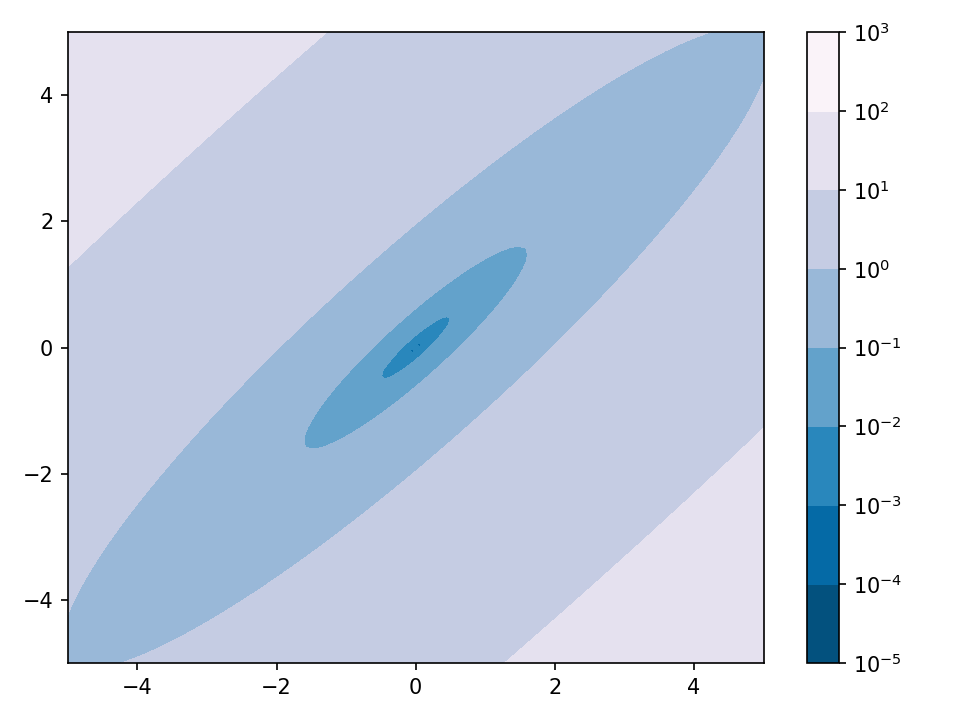

In [44]:
N = 100
x = np.linspace(-5.0, 5.0, N)
y = np.linspace(-5.0, 5.0, N)

X, Y = np.meshgrid(x, y)
inp = (X,Y)
z = g(inp)
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
cbar = fig.colorbar(cs)
plt.show()

Running co-ord search

In [45]:
omega_k = (3,4)
best_point = omega_k
value = g(omega_k)
random_value = value

x_list_1 = [omega_k[0]]
y_list_1 = [omega_k[1]]
z_list_1 = [value]
index_1 = [0]
all_values_1 = [value]

directions = [(1,0),(0,1),(-1,0),(0,-1)]

for i in range(K):
    for j in range(len(directions)):
        random_point = (omega_k[0]+directions[j][0]*(1/(1+i)), omega_k[1]+directions[j][1]*(1/(1+i)))
        if(g(random_point)<random_value):
            random_value = g(random_point)
            best_point = random_point
                
    if(random_value<value):
        value = random_value
        omega_k = best_point
        x_list_1.append(omega_k[0])
        y_list_1.append(omega_k[1])
        z_list_1.append(value)
        print("step:"+str(i+1)+' : evaluation ='+str(value))
    else:
        print("step:"+str(i+1)+' : evaluation ='+str(value))
    all_values_1.append(value)
    index_1.append(i+1)

step:1 : evaluation =0.35999999999999943
step:2 : evaluation =0.35999999999999943
step:3 : evaluation =0.34888888888888925
step:4 : evaluation =0.2951388888888893
step:5 : evaluation =0.2755388888888892
step:6 : evaluation =0.2556499999999997
step:7 : evaluation =0.2429561224489798
step:8 : evaluation =0.22894719387755114
step:9 : evaluation =0.21974437200806296
step:10 : evaluation =0.20905389581758627
step:11 : evaluation =0.20193570088120927
step:12 : evaluation =0.19336282930833804
step:13 : evaluation =0.18761946156497
step:14 : evaluation =0.18050807295358107
step:15 : evaluation =0.1757336621791712
step:16 : evaluation =0.16968753642992018
step:17 : evaluation =0.16562937698075797
step:18 : evaluation =0.16039166244402336
step:19 : evaluation =0.15688234406880963
step:20 : evaluation =0.15227746531323394
step:21 : evaluation =0.1491004832784455
step:22 : evaluation =0.1450990378401864
step:23 : evaluation =0.14227689566638468
step:24 : evaluation =0.1386856421642242
step:25 : ev

Plotting the descent on the contour map

<IPython.core.display.Javascript object>


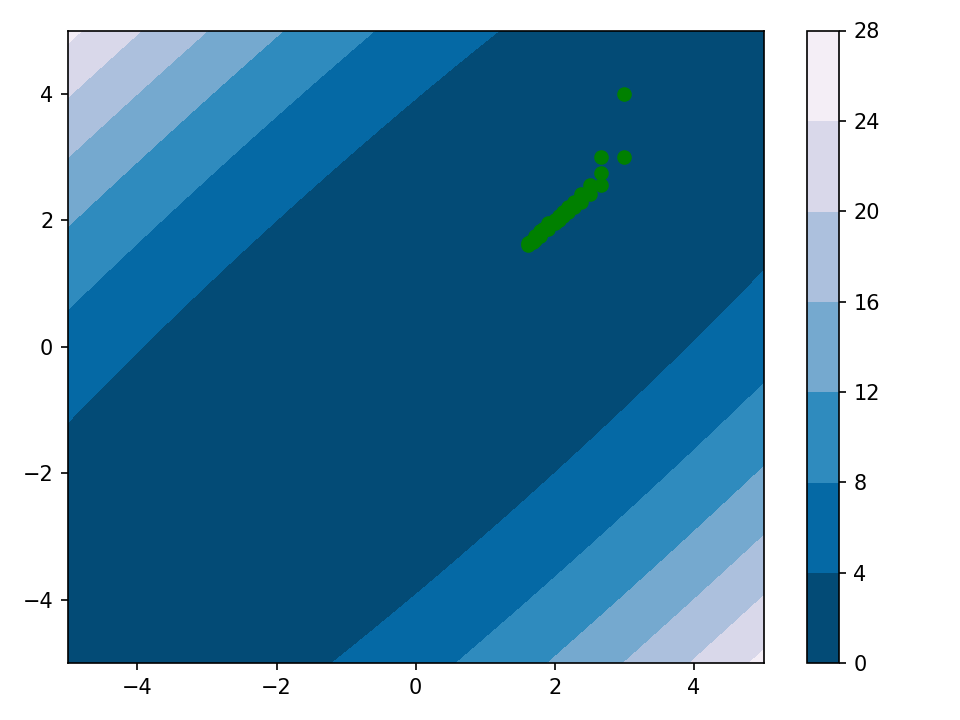

In [46]:
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, z, cmap=cm.PuBu_r)
ax.scatter(x_list_1,y_list_1,c='green')
cbar = fig.colorbar(cs)
plt.show()

Running co-ord descent

In [55]:
omega_k = (3,4)
best_point = omega_k
value = g(omega_k)
random_value = value

x_list_2 = [omega_k[0]]
y_list_2 = [omega_k[1]]
z_list_2 = [value]
index_2 = [0]
all_values_2 = [value]

x_directions = [(1,0),(-1,0)]
y_directions = [(0,1),(0,-1)]
directions=[y_directions,x_directions]
for i in range(K):
    for j in range(2):
        for k in range(2):
            random_point = (omega_k[0]+directions[j][k][0]*(1/(1+i)), omega_k[1]+directions[j][k][1]*(1/(1+i)))
            if(g(random_point)<random_value):
                random_value = g(random_point)
                best_point = random_point
                
        if(random_value<value):
            value = random_value
            omega_k = best_point
            x_list_2.append(omega_k[0])
            y_list_2.append(omega_k[1])
            z_list_2.append(value)
            print("step:"+str(i+1)+'.'+str(j)+' : evaluation ='+str(value))
        else:
            print("step:"+str(i+1)+'.'+str(j)+' : evaluation ='+str(value))
        all_values_2.append(value)
        index_2.append(i+1)

step:1.0 : evaluation =0.35999999999999943
step:1.1 : evaluation =0.35999999999999943
step:2.0 : evaluation =0.35999999999999943
step:2.1 : evaluation =0.35999999999999943
step:3.0 : evaluation =0.34888888888888925
step:3.1 : evaluation =0.2844444444444445
step:4.0 : evaluation =0.274027777777778
step:4.1 : evaluation =0.2336111111111112
step:5.0 : evaluation =0.22467777777777842
step:5.1 : evaluation =0.1965444444444442
step:6.0 : evaluation =0.18898888888888887
step:6.1 : evaluation =0.16809999999999992
step:7.0 : evaluation =0.161691836734694
step:7.1 : evaluation =0.14548775510204104
step:8.0 : evaluation =0.1400145408163267
step:8.1 : evaluation =0.1270413265306125
step:9.0 : evaluation =0.12233056815318721
step:9.1 : evaluation =0.11169388384983625
step:10.0 : evaluation =0.10760975686570906
step:10.1 : evaluation =0.0987256298815824
step:11.0 : evaluation =0.09516154749931793
step:11.1 : evaluation =0.08763052296829343
step:12.0 : evaluation =0.08450233634010706
step:12.1 : eval

Plotting descent on contour map

<IPython.core.display.Javascript object>


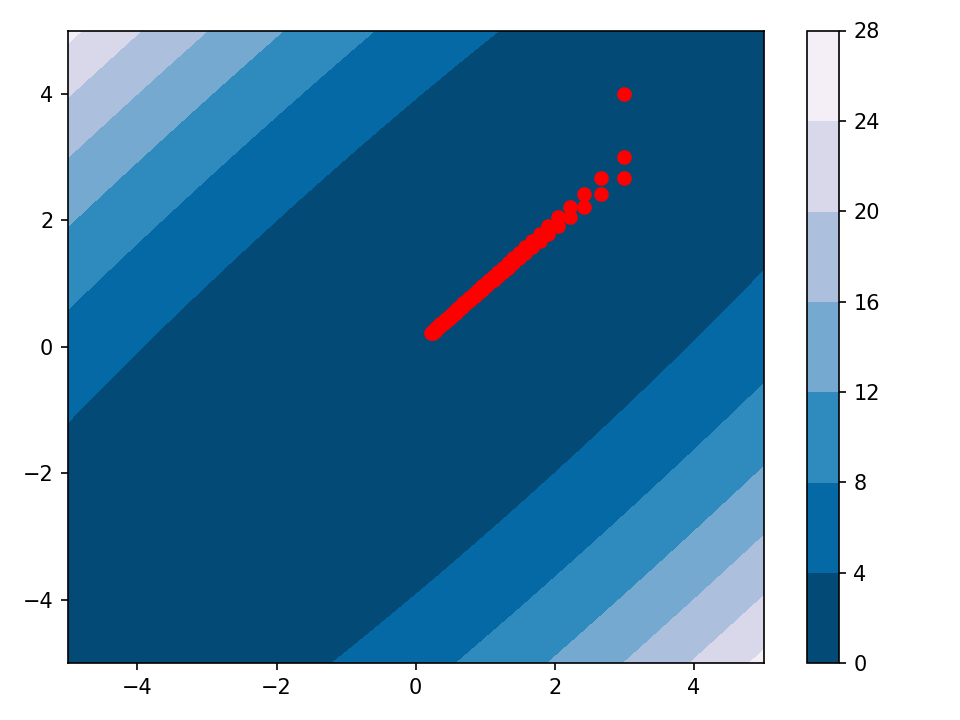

In [56]:
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, z, cmap=cm.PuBu_r)
ax.scatter(x_list_2,y_list_2,c='red')
cbar = fig.colorbar(cs)
plt.show()

Plotting both on the same contour plot
Here the co-ordinate search algorithm is plotted in green and the co-ordinate descent algorithm is plotted in red

<IPython.core.display.Javascript object>


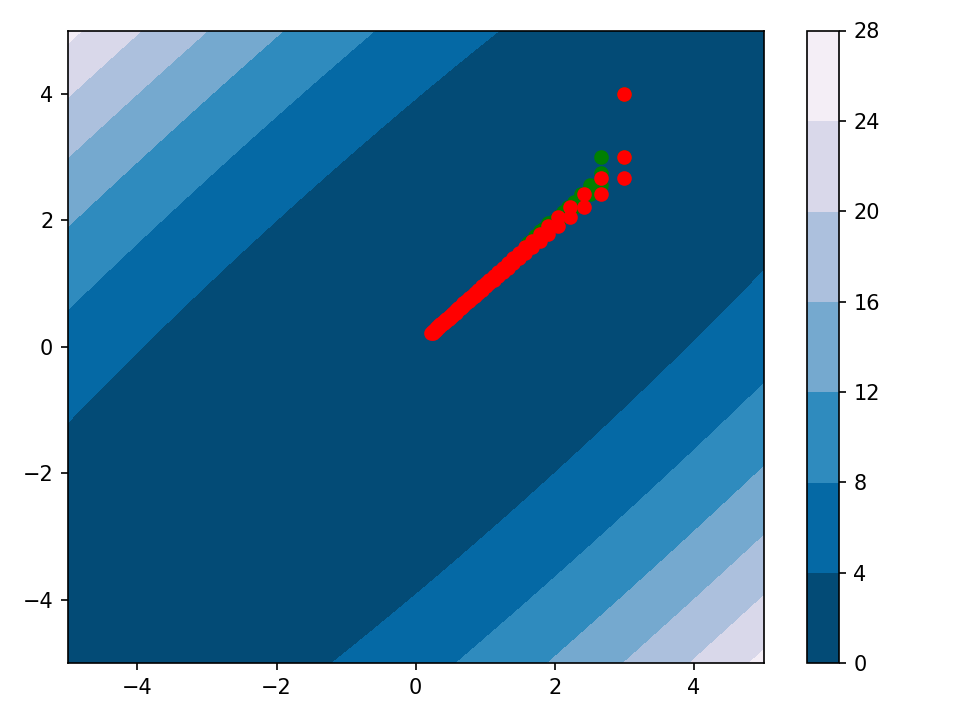

In [57]:
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, z, cmap=cm.PuBu_r)
ax.scatter(x_list_1,y_list_1,c='green')
ax.scatter(x_list_2,y_list_2,c='red')
cbar = fig.colorbar(cs)
plt.show()

This may be hard to see if plots overlap 

Here is the cost function history plot for both algorithms

<IPython.core.display.Javascript object>


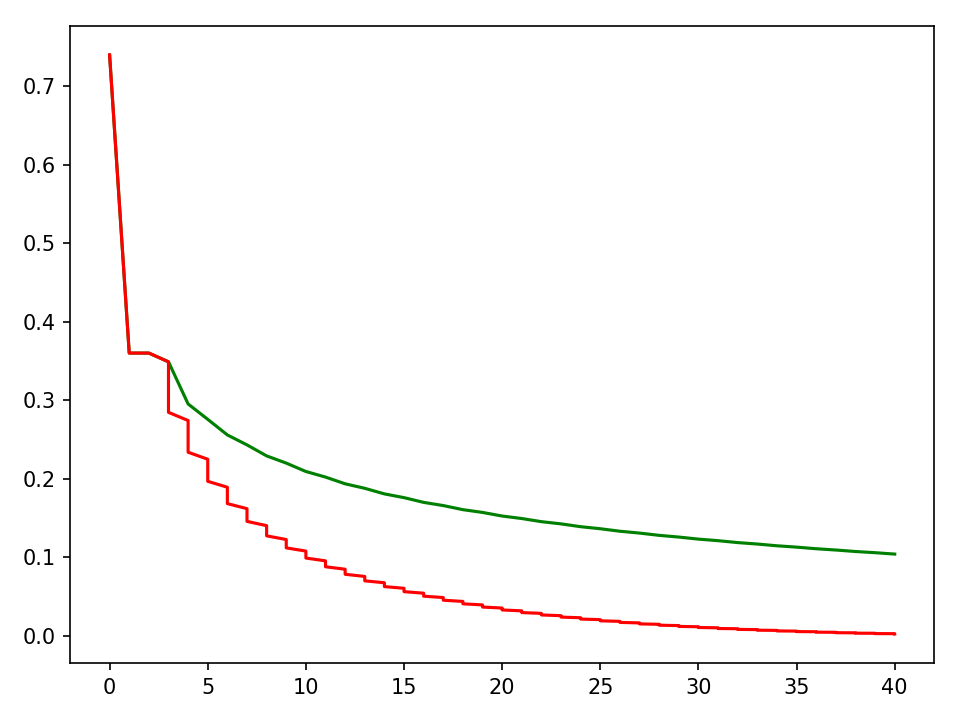

In [58]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(index_1,all_values_1, c='green') 
ax.plot(index_2,all_values_2, c='red') 